# <center> INX FUTURE INC EMPLOYEE PERFORMANCE ANALYSIS

## <center> BUISNESS CASE:BASED ON GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE PERFOMANCE RATING OF EMPLOYEE

***For better visualisation i have deployed a app using streamlit***
## Deployment Link:
### https://inxemployeeperformance.streamlit.app/

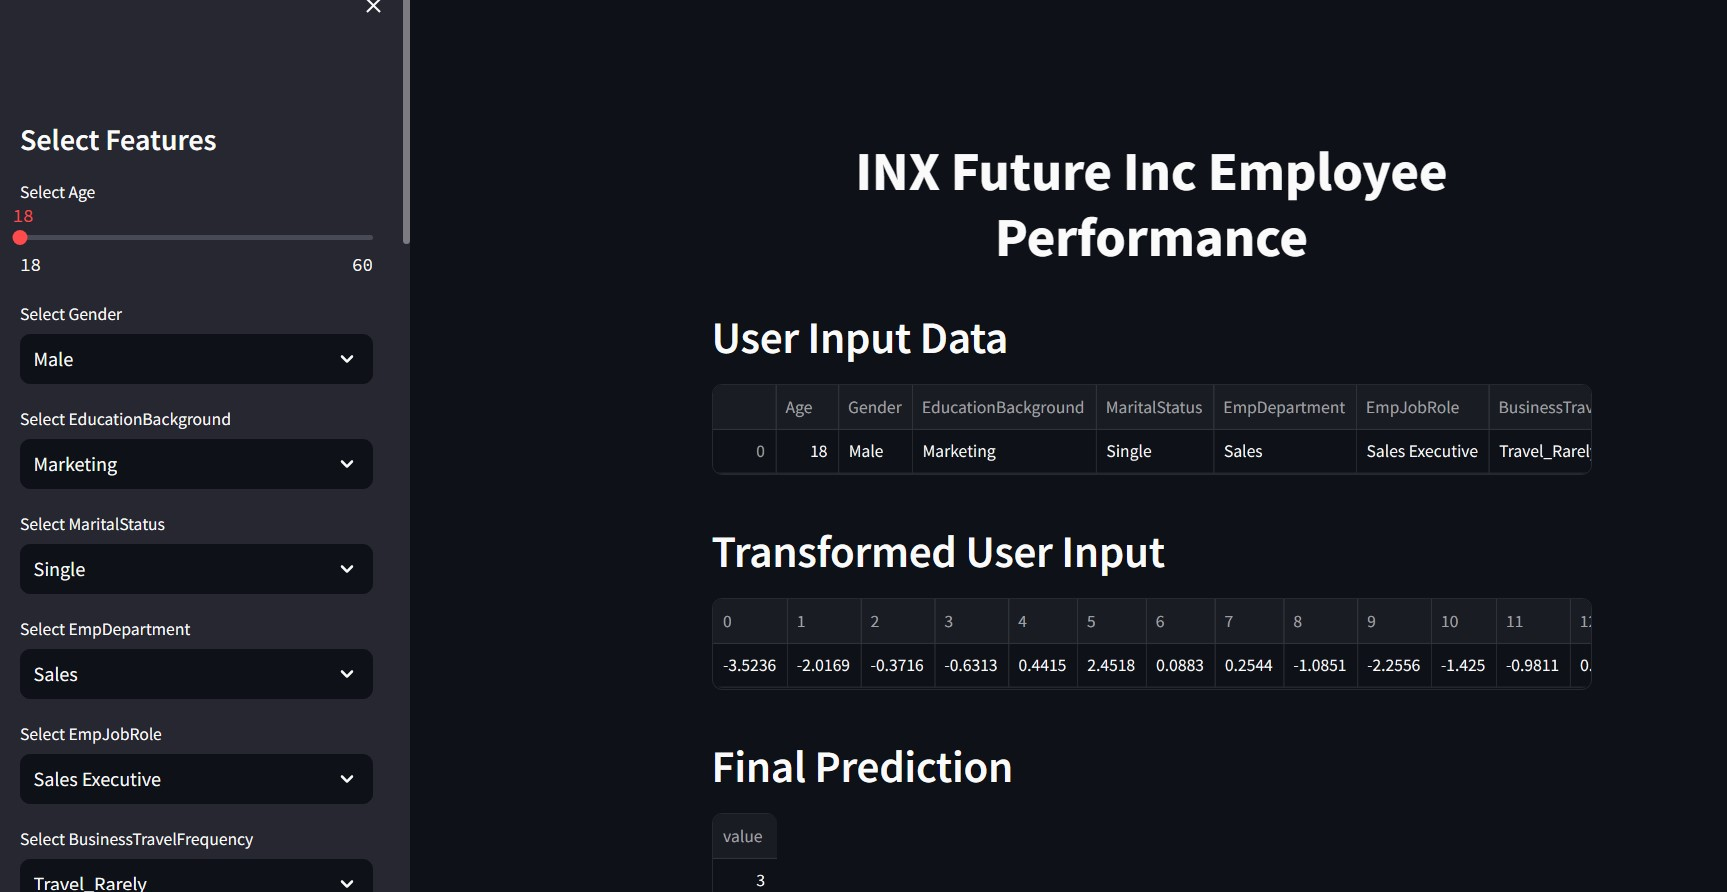

### Importing the libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.decomposition import PCA
import joblib
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_column', None)


In [2]:
data = pd.read_excel("../../data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (1).xls")

In [3]:
user_input = pd.DataFrame(data.iloc[0,:]).T

In [4]:
user_input

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3


In [5]:
# Drop the target variable and unnecessary columns
user_input.drop(columns=['PerformanceRating', 'EmpNumber'], inplace=True)

In [6]:
# Original encoding dictionary
encoding_dict = {'Other': 0, 'Life Sciences': 1, 'Marketing': 2, 'Human Resources': 3, 'Technical Degree': 4, 'Medical': 5}


user_input['EducationBackground'] = encoding_dict.get(user_input['EducationBackground'].values[0])

In [7]:
label_encoder = joblib.load('../../data/encoder_model.joblib')


for col, model_info in label_encoder.items():
    encoder_model = model_info['model']
    user_input[col] = encoder_model.transform(user_input[col])

In [8]:
user_input

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0


In [9]:
# Load the power transformer
power_trans = joblib.load('../../data/power_transform.joblib')

# Specify columns to transform
col_trans = ['Age', 'EmpEducationLevel', 'EducationBackground', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate',
             'EmpJobInvolvement', 'EmpJobSatisfaction', 'EmpRelationshipSatisfaction', 'TrainingTimesLastYear',
             'EmpWorkLifeBalance']

# Extract the columns to transform
col_to_trans = user_input[col_trans]

# Transform the selected columns
user_input[col_trans] = power_trans.transform(col_to_trans) 


In [10]:
user_input

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,-0.480322,1,-0.118755,2,5,13,2,10,0.067029,1.214956,-0.51971,0.321309,2,1.189745,1,0,12,1.227297,10,-0.583798,-1.095649,10,7,0,8,0


In [11]:
# Standardize the features
scaler = joblib.load('../../data/scaled.joblib')

In [12]:
user_input_scaled = scaler.transform(user_input)

In [13]:
# Save the PCA model
pca = joblib.load('../../data/pca_model.joblib')

In [14]:
user_input_pca = pca.transform(user_input_scaled)

In [15]:
# Load the trained model
rand_for_best_para = joblib.load('../../data/random_for_class_hyp.joblib')

In [16]:
rand_for_best_para.predict(user_input_pca)

array([3], dtype=int64)